# Library installs and imports

In [5]:
!apt install libzbar0
!pip install pyzbar
!pip install kraken

import cv2
import numpy as np
from pyzbar.pyzbar import decode, ZBarSymbol
from PIL import Image
from kraken import binarization
from google.colab.patches import cv2_imshow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libzbar0 is already the newest version (0.10+doc-10.1build2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


# Data Exploration 1 - Original Data

Though we have a lot of drone footage and pictures to choose from, we first decided to work with a picture we thought our model would have a relatively easy time detecting and decoding. We used both the pyzbar library opencv library as methods of detecting the QR code.

In [6]:
# Functions to decode using pyzbar and opencv's built-in QR code detector

def pyzbar_decode(img_path):
  print('PyZBar Decode method')
  img = Image.open(img_path)
  print('Detection data: ', decode(img))

def opencv_decode(img_path):
  print('OpenCV Decode method')
  img = cv2.imread(img_path)
  retval, points = cv2.QRCodeDetector().detect(img)
  print('Was a QR code found?', retval)
  if retval:
      data, straight_code = cv2.QRCodeDetector().decode(img, points)
      if len(data) > 0:
        print('Detection data: \n', data)
      else:
        print('QR tag could not be decoded')

In [ ]:
image_path = '/content/drive/My Drive/480ChevronDrone/Test Images/vlcsnap-2020-10-29-15h36m31s463.png'
pyzbar_decode(image_path)
print('-------------------')
opencv_decode(image_path)
print('-------------------')
Image.open(image_path)

Looks like using OpenCV, we were able to detect the QR code in this image! Unfortunately, PyZBar was not able to detect and decode it so we tried other methods.

# Data Exploration 2 - Zoom
Since the previous method wasn't able to detect the QR code using PyZBar, we tried manipulating our images to see if we would be able to get better results. Our first method was to simply zoom into the image.

PyZBar Decode method
Detection data:  []
-------------------
OpenCV Decode method
Was a QR code found? False
-------------------


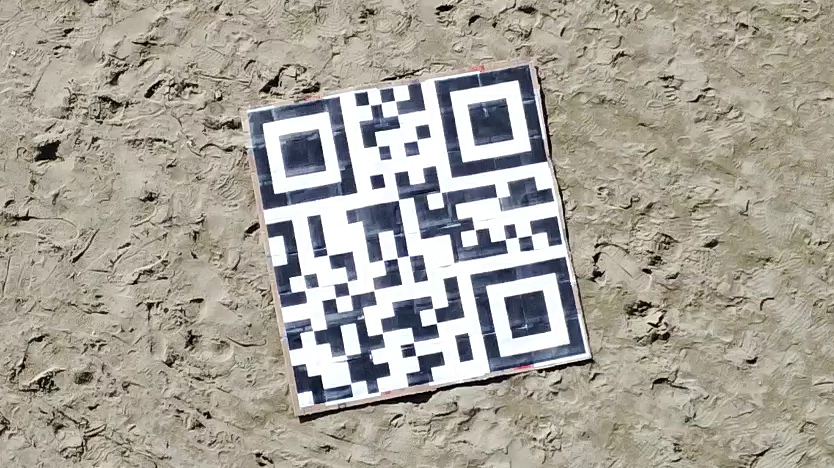

In [ ]:
image_path = '/content/drive/My Drive/480ChevronDrone/Test Images/qr_code_easy_scan_cropped.png'
pyzbar_decode(image_path)
print('-------------------')
opencv_decode(image_path)
print('-------------------')
Image.open(image_path)

Our results from this was interesting. We figured zooming into the data would make it easier for our code to pick up on the tag, but both methods were not able to find the tag.

# Data Exploration 3 - Straighten

Since our previous method of zooming into the image did not work, we thought that perhaps straightening the QR code might help. Though this may be probably slightly impractical for real-world usage, we thought it might be possible if the drone hovers over the tags at the correct angle.


In [ ]:
image_path = '/content/drive/My Drive/480ChevronDrone/Test Images/qr_code_easy_scan_cropped_straight.png'
pyzbar_decode(image_path)
print('-------------------')
opencv_decode(image_path)
print('-------------------')
Image.open(image_path)

Success! Both methods were able to detect the QR code and PyZBar was even able to decode it. However as previously mentioned, this may be impractical so our next steps were applying filters to the image.

# Data Exploration 4 - Image Pre-Processing

In this section, we performed image pre-processing on the zoomed in image as that was a better real-world case than the straightened one. Here, we applied binarization and grayscale filters for each respective methodology.

PyZBar Decode method (with binarization)
Detection data:  []


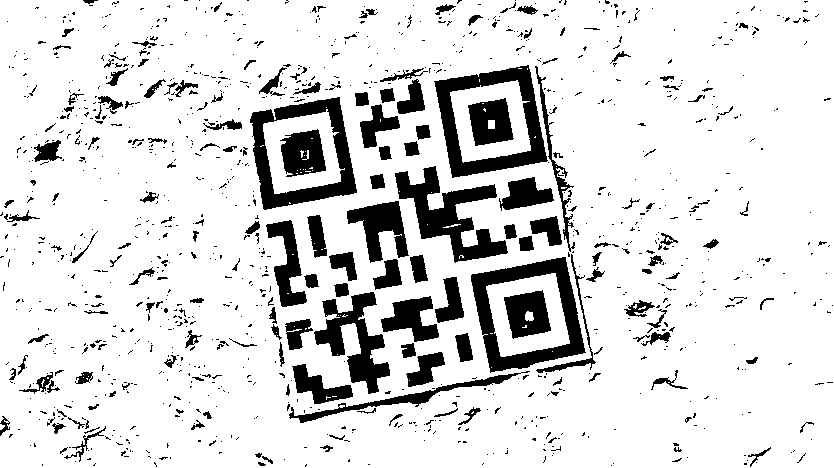

In [ ]:
image_path = '/content/drive/My Drive/480ChevronDrone/Test Images/qr_code_easy_scan_cropped.png'
# Binarization performed using kraken library
img = Image.open(image_path)
bw_img = binarization.nlbin(img)
print('PyZBar Decode method (with binarization)')
print('Detection data: ', decode(bw_img, symbols=[ZBarSymbol.QRCODE]))
bw_img

In [ ]:
image_path = '/content/drive/My Drive/480ChevronDrone/Test Images/qr_code_easy_scan_cropped.png'
# Pre-processing filter added using OpenCV
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret, bw_img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('PyZBar Decode method (with OpenCV filter)')
print('Detection data: ', decode(bw_img))
print('*Image with filter not viewable using OpenCV*')

PyZBar Decode method (with OpenCV filter)
Detection data:  []
*Image with filter not viewable using OpenCV*


Unfortunately image pre-processing did not yield any positive results either. 